In [ ]:
!pip install evaluate

In [6]:
from transformers import pipeline
from datasets import load_dataset
from evaluate import evaluator
import evaluate

In [10]:
pipe = pipeline('text-classification', model='lvwerra/distilbert-imdb')

In [11]:
data = load_dataset('imdb',split='test').shuffle().select(range(1000))

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [12]:
metric = evaluate.load('accuracy')

In [13]:
task_evaluator = evaluator('text-classification')

In [21]:
results = task_evaluator.compute(model_or_pipeline=pipe, data=data, metric=metric,label_mapping={'NEGATIVE':0, 'POSITIVE':1})

In [22]:
print(results)

{'accuracy': 0.92, 'total_time_in_seconds': 261.5848366189998, 'samples_per_second': 3.822851557166164, 'latency_in_seconds': 0.26158483661899984}


#### With bootstrapping evaluate computes confidence intervals and the standard error which helps estimate how stable a score is:

In [25]:
results = task_evaluator.compute(model_or_pipeline=pipe, data=data, metric=metric,
                       label_mapping={"NEGATIVE": 0, "POSITIVE": 1},
                       strategy="bootstrap", n_resamples=200)

print(results)

{'accuracy': {'confidence_interval': (0.9024218314724781, 0.9370687174753378), 'standard_error': 0.008463483488718997, 'score': 0.92}, 'total_time_in_seconds': 254.60503395, 'samples_per_second': 3.927652114672574, 'latency_in_seconds': 0.25460503395}


### Visualization

In [31]:
import evaluate
from evaluate.visualization import radar_plot

In [60]:
data = [
   {"accuracy": 0.99, "precision": 0.8, "f1": 0.95, "latency_in_seconds": 93.6},
   {"accuracy": 0.98, "precision": 0.87, "f1": 0.91, "latency_in_seconds": 81.2},
   {"accuracy": 0.98, "precision": 0.78, "f1": 0.88, "latency_in_seconds": 87.6}, 
   {"accuracy": 0.88, "precision": 0.78, "f1": 0.81, "latency_in_seconds": 91.6}
   ]

In [61]:
model_names = ['Model 1', 'Model A', 'Model B', 'Model C']

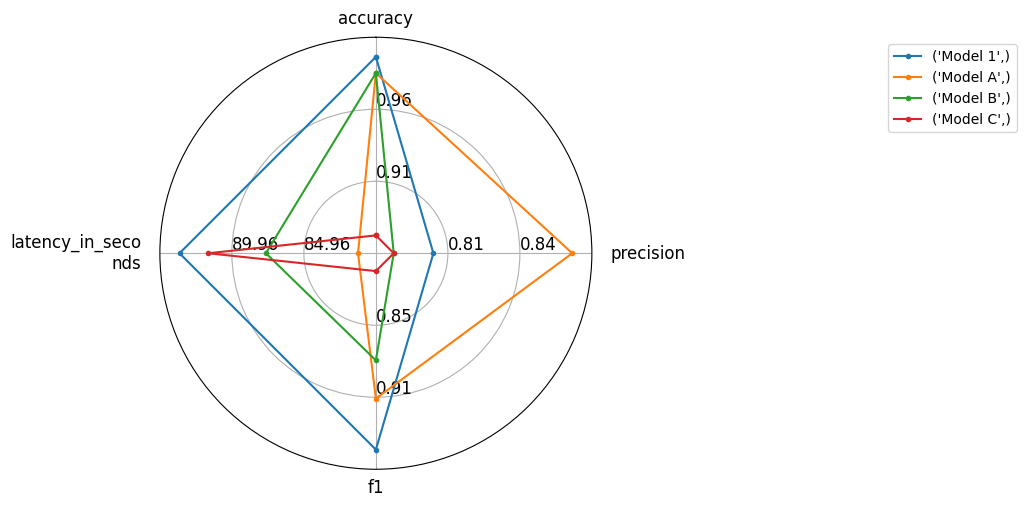

In [64]:
plot = radar_plot(data=data, model_names=model_names)

In [63]:
plot.show()